## Tutorial: Conformers with rdkit

### Isoprene dimer

Import `gecos` library and create a variable for the molecule file path

In [1]:
import gecos
pdbfile="/home/jramos/PycharmProjects/GeCos/data/IsoP.pdb"

In the first example a pdb file for a dimer of polyisoprene molecule will be used:

In [2]:
import nglview
view = nglview.show_structure_file(pdbfile)
view.clear_representations()
view.add_representation(repr_type='licorice', selection='all')
view._remote_call('setSize', target='Widget', args=['','500px'])
view

NGLWidget()

Setup molecule to generate the conformers. As the pdb file does not contain information about the bond orders,
the bond order flag should be ``True`` for a correct assignation of bonds (see picture below).

In [3]:
g1_pdb_ms = gecos.GecosRdkit(filename=pdbfile, bond_perception=True, logger=None)
g1_pdb_ms_nobo = gecos.GecosRdkit(filename=pdbfile, bond_perception=False, logger=None)



        ***********************************************************************
                           Generation of Conformers (GeCoS)
                         -----------------------------------
                         
                                    Version 0.1
                         
                                  Dr. Javier Ramos
                          Macromolecular Physics Department
                    Instituto de Estructura de la Materia (IEM-CSIC)
                                   Madrid (Spain)
                                   
                GeCoS is an open-source python library to quickly generate
                conformers of small molecules or polymer segments 
                using RdKit and OpenBabel libraries. Once, the
                conformers are generated, QM optimizations and subsequent 
                clustering can be done.
                
                This software is distributed under the terms of the
                GNU General

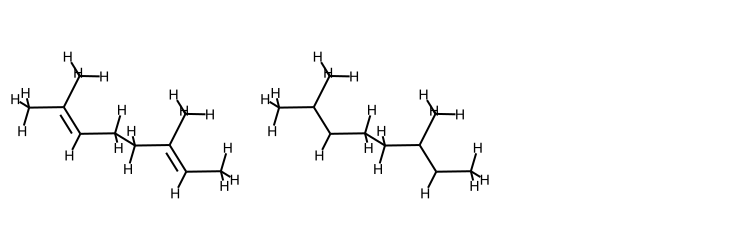

In [4]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True
m1 = g1_pdb_ms.mol_rdkit
m2 = g1_pdb_ms_nobo.mol_rdkit
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

As you can see, the molecule on the right has not correctly assigned the double bonds.
Now, the conformers will be generated:

In [5]:
g1_pdb_ms.generate_conformers(nconfs=50, minimize_iterations=3000, pattern="IsoP")
g1_pdb_ms.write_all_conformers_to_pdb("IsoP_conf_all_trj.pdb")


		 ======== GENERATE CONFORMERS ========
		 1. Generating 50 conformers (04-07-2021 12:31:30)
		 2. Minimizing 50 conformers. Max_iters = 3000, threshold = 2.0 A (04-07-2021 12:31:30)
			 Using MMFF forcefield
Minimizing[########################################] 50/50
		 3. Cluster Conformers (04-07-2021 12:31:31)
			Generated: 50 conformers and 8 clusters
		 4. Get structure of minimum energy for each cluster (04-07-2021 12:31:31)
		 5. Write Conformers to PDB (04-07-2021 12:31:31)
		 6. Write Conformers to Gaussian16 (04-07-2021 12:31:31)


Visualize all generated conformers

In [6]:
import nglview as nv
import MDAnalysis as mda
u = mda.Universe("IsoP_conf_all_trj.pdb")
mol = u.select_atoms('all')
t = nv.MDAnalysisTrajectory(mol)
w = nv.NGLWidget(t)
w

NGLWidget(max_frame=49)

Visualize the lowest-energy conformers for each cluster

In [7]:
u = mda.Universe("IsoP_conf_min_trj.pdb")
mol = u.select_atoms('all')
t = nv.MDAnalysisTrajectory(mol)
w = nv.NGLWidget(t)
w

NGLWidget(max_frame=7)

Several input files for Gaussian16 are generated. These conformers corresponds to the lowest-energy
conformer in each cluster. Furthermore, two pdb trajectories have been created, containing all conformers and only
the lowest-energy ones.

### PET dimer

In [8]:
mol2file="/home/jramos/PycharmProjects/GeCos/data/PET2.mol2"
view = nglview.show_structure_file(mol2file)
view.clear_representations()
view.add_representation(repr_type='licorice', selection='all')
view._remote_call('setSize', target='Widget', args=['','500px'])
view

NGLWidget()

In [9]:
g1_mol2_ms = gecos.GecosRdkit(filename=mol2file, bond_perception=False, logger=None)


        ***********************************************************************
                           Generation of Conformers (GeCoS)
                         -----------------------------------
                         
                                    Version 0.1
                         
                                  Dr. Javier Ramos
                          Macromolecular Physics Department
                    Instituto de Estructura de la Materia (IEM-CSIC)
                                   Madrid (Spain)
                                   
                GeCoS is an open-source python library to quickly generate
                conformers of small molecules or polymer segments 
                using RdKit and OpenBabel libraries. Once, the
                conformers are generated, QM optimizations and subsequent 
                clustering can be done.
                
                This software is distributed under the terms of the
                GNU General

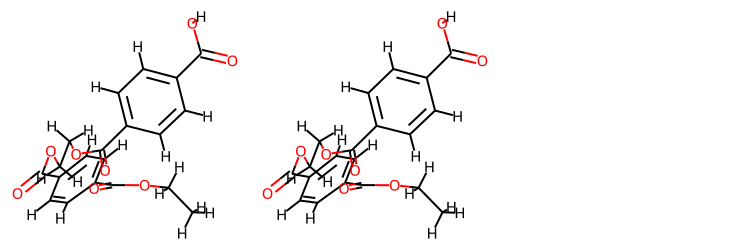

In [10]:
IPythonConsole.ipython_useSVG=True
m1 = g1_mol2_ms.mol_rdkit
Draw.MolsToGridImage((m1, m1), subImgSize=(250,250))

In [11]:
g1_mol2_ms.generate_conformers(nconfs=50, minimize_iterations=3000, pattern="PET2")
g1_mol2_ms.write_all_conformers_to_pdb("PET2_conf_all_trj.pdb")


		 ======== GENERATE CONFORMERS ========
		 1. Generating 50 conformers (04-07-2021 12:31:34)
		 2. Minimizing 50 conformers. Max_iters = 3000, threshold = 2.0 A (04-07-2021 12:31:35)
			 Using MMFF forcefield
Minimizing[########################################] 50/50
		 3. Cluster Conformers (04-07-2021 12:31:38)
			Generated: 50 conformers and 9 clusters
		 4. Get structure of minimum energy for each cluster (04-07-2021 12:31:38)
		 5. Write Conformers to PDB (04-07-2021 12:31:38)
		 6. Write Conformers to Gaussian16 (04-07-2021 12:31:38)


In [12]:
import nglview as nv
import MDAnalysis as mda
u = mda.Universe("PET2_conf_all_trj.pdb")
mol = u.select_atoms('all')
t = nv.MDAnalysisTrajectory(mol)
w = nv.NGLWidget(t)
w

NGLWidget(max_frame=49)

In [13]:
u = mda.Universe("PET2_conf_min_trj.pdb")
mol = u.select_atoms('all')
t = nv.MDAnalysisTrajectory(mol)
w = nv.NGLWidget(t)
w


NGLWidget(max_frame=8)